YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


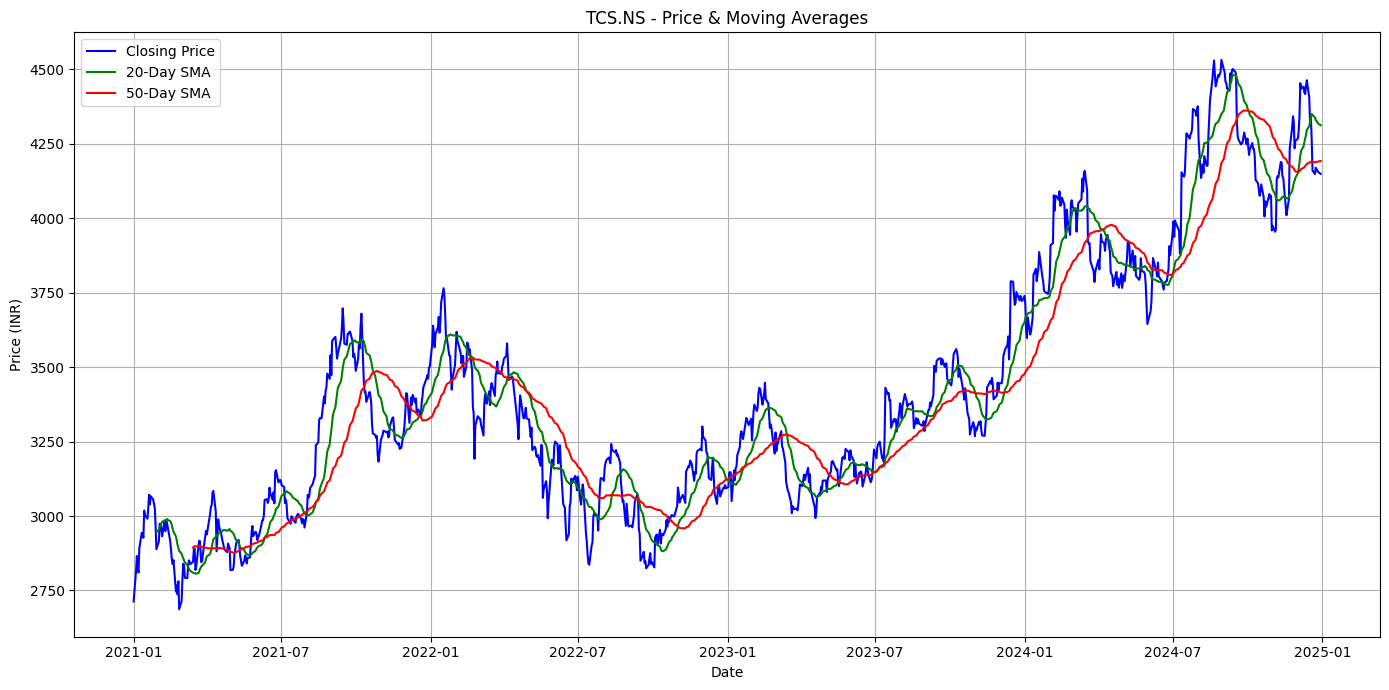

In [15]:
# Step 1: Import Libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Get Stock Data
ticker = "TCS.NS"  # NSE listed stock (Tata Consultancy Services)
data = yf.download(ticker, start="2021-01-01", end="2024-12-31")

# Step 3: Calculate Moving Averages
data["SMA_20"] = data["Close"].rolling(window=20).mean()
data["SMA_50"] = data["Close"].rolling(window=50).mean()

# Step 4: Plot Data
plt.figure(figsize=(14, 7))
plt.plot(data["Close"], label="Closing Price", color='blue')
plt.plot(data["SMA_20"], label="20-Day SMA", color='green')
plt.plot(data["SMA_50"], label="50-Day SMA", color='red')
plt.title(f"{ticker} - Price & Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14680\1667771747.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][data['SMA_20'] > data['SMA_50']] = 1  # Buy signal
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14680\1667771747.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][data['SMA_20'] > data['SMA_50']] = 1  # Buy signal
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14680\1667771747.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

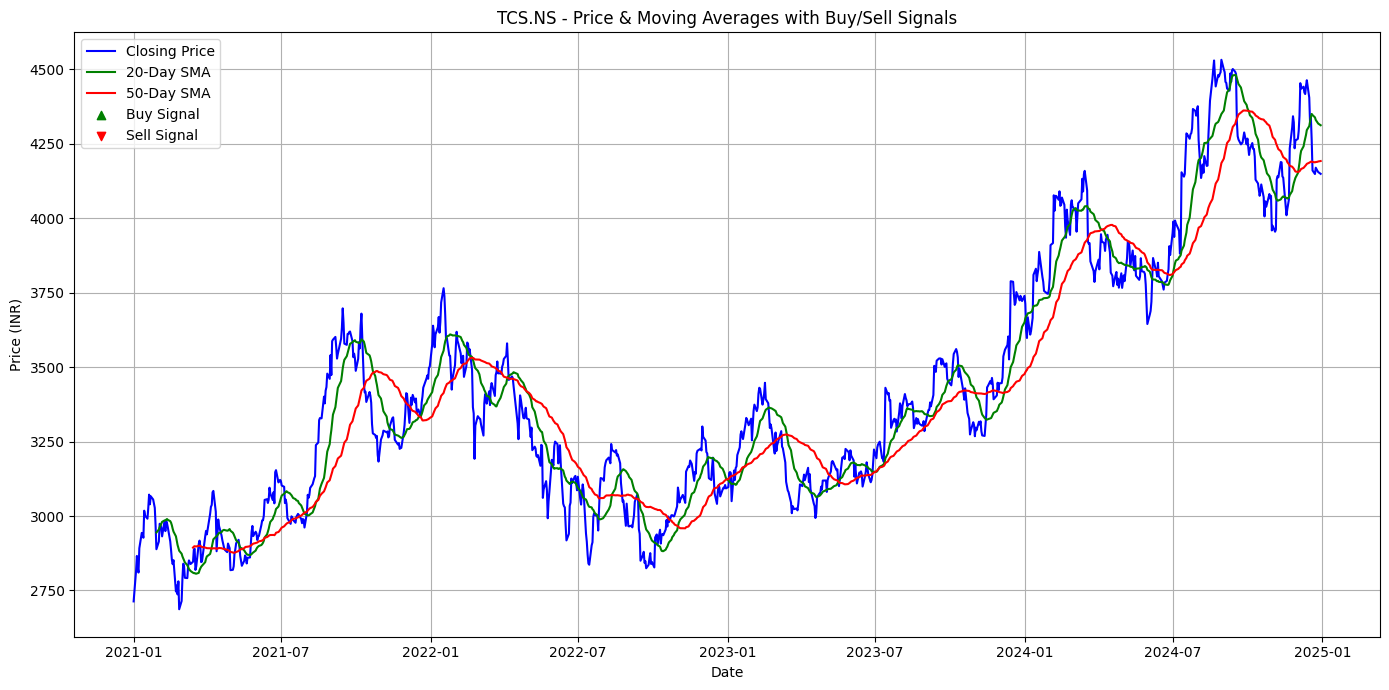

In [16]:
# Step 5: Generate Buy/Sell Signals based on SMA crossover
data['Signal'] = 0  # Default to no signal
data['Signal'][data['SMA_20'] > data['SMA_50']] = 1  # Buy signal
data['Signal'][data['SMA_20'] < data['SMA_50']] = -1  # Sell signal

# Step 6: Plot Buy/Sell Signals on the chart
buy_signals = data[data['Signal'] == 1]
sell_signals = data[data['Signal'] == -1]

plt.figure(figsize=(14, 7))
plt.plot(data["Close"], label="Closing Price", color='blue')
plt.plot(data["SMA_20"], label="20-Day SMA", color='green')
plt.plot(data["SMA_50"], label="50-Day SMA", color='red')

plt.scatter(buy_signals.index, buy_signals["Close"], marker="^", color="green", label="Buy Signal", alpha=1)
plt.scatter(sell_signals.index, sell_signals["Close"], marker="v", color="red", label="Sell Signal", alpha=1)

plt.title(f"{ticker} - Price & Moving Averages with Buy/Sell Signals")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
